## Car Insurance Modelling

Car insurance modelling refers to the use of statistical and mathematical models to accurately predict events such as the frequency of claims, the severity of claims, or the total cost associated with claims, which in turn helps in pricing insurance products, managing risk, and optimizing business strategies.


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import ppscore as pps
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import ttest_ind
# for modelling
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [4]:
def read_data(path_to_csv_file):
    '''
    Reads csv files from specified paths

    Parameters:
            path to csv file locations
    Returns:
            dataframes of imported csv files
    '''
    # Read CSV files
    df = pd.read_csv(path_to_csv_file)
    
    return df

data = read_data('insurance_claims.csv')

In [5]:
def df_snapshot(df):
    '''
    Returns top 5 rows of the dataframe.

    Parameters:
        df (DataFrame): Pandas dataframe
    '''
    return display(df.head())

print(f'claims data:')
df_snapshot(data)

claims data:


,age_of_driver,car_age,region,number_of_claims
0,30,7,Urban,0
1,33,10,Rural,2
2,39,11,Suburban,1
3,18,12,Urban,0
4,21,8,Urban,0


In [6]:
def data_types(df):
    '''
    Returns datatype of fields in a dataframe.

    Parameters:
        df (DataFrame): Pandas dataframe
    '''
    return df.info()

print(f'claims data:')
data_types(data)

claims data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_of_driver     1000 non-null   int64 
 1   car_age           1000 non-null   int64 
 2   region            1000 non-null   object
 3   number_of_claims  1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [7]:
def null_checker(df):
    '''
    Returns the count of rows found in the data frame where there is a null present.

    Parameters:
        df (Dataframe): Pandas dataframe

    Returns:
        Prints the null count, null percentage, and row count per column.
    '''
    row_count = len(df)
    null_counts = df.isnull().sum().sort_values(ascending=False)
    null_percentages = (null_counts / row_count) * 100
    combined = pd.concat([null_counts, null_percentages], axis=1, keys=['Null Count', 'Null Percentage'])
    combined['Row Count'] = row_count
    print(combined)

# check nulls in train
print(f'claims data:')
null_checker(data)

claims data:
                  Null Count  Null Percentage  Row Count
age_of_driver              0              0.0       1000
car_age                    0              0.0       1000
region                     0              0.0       1000
number_of_claims           0              0.0       1000


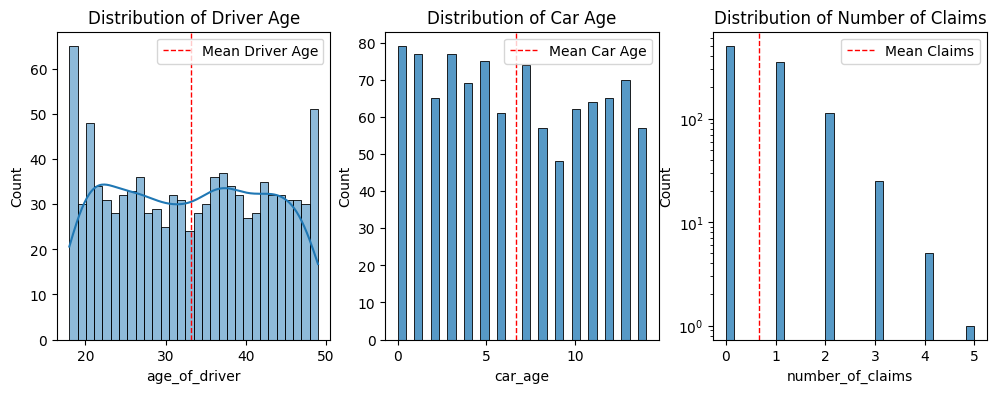

In [11]:
# Plotting distributions of Car age and age of driver
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(data['age_of_driver'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Driver Age')
axes[0].axvline(data['age_of_driver'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Driver Age')
axes[0].legend() 

sns.histplot(data['car_age'], bins=30, kde=False, ax=axes[1])
axes[1].set_title('Distribution of Car Age')
axes[1].axvline(data['car_age'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Car Age')
axes[1].legend() 

sns.histplot(data['number_of_claims'], bins=30, kde=False, ax=axes[2])
axes[2].set_title('Distribution of Number of Claims')
axes[2].axvline(data['number_of_claims'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Claims')
axes[2].legend() 
axes[2].set_yscale('log') 
plt.show()

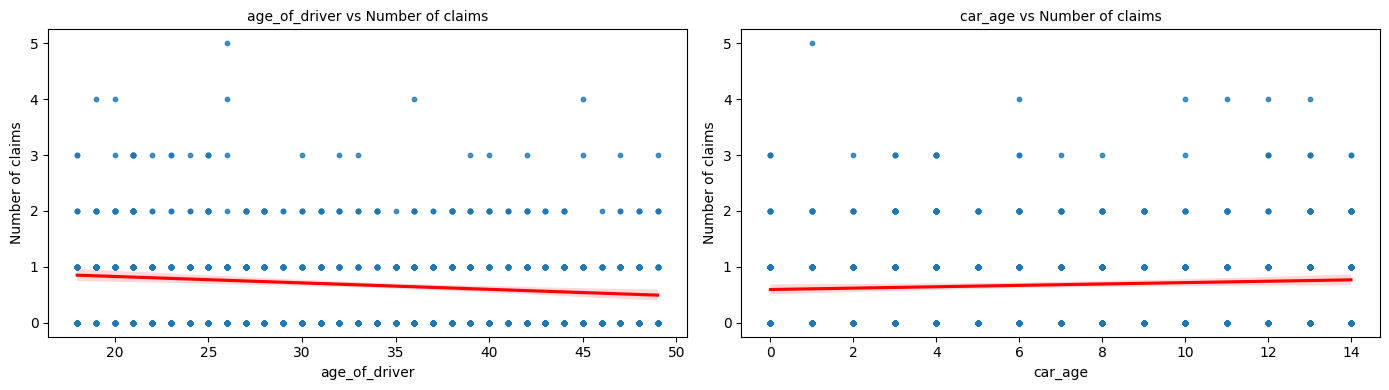

In [17]:
# Define the numerical columns
numerical_cols = ['age_of_driver','car_age','number_of_claims']

# Calculate the number of plots (excluding 'Price' as it's the y-axis)
num_plots = len(numerical_cols[:-1])
n_cols = 2
n_rows = (num_plots + 1) // n_cols

# Create a subplot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()

# Plot each numerical column against 'Numebr of claims'
for i, col in enumerate(numerical_cols[:-1]):
    sns.regplot(data=data, x=col, y='number_of_claims', ax=axes[i], scatter_kws={"s": 10}, line_kws={"color": "red"})
    axes[i].set_title(f'{col} vs Number of claims', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Number of claims')

# Remove any unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

- There is a slight negative trend for age of driver vs number of claims indicated by the red line, suggesting that as younger drivers tend to have more claims and older drivers tend to have fewer claims. However, the overall spread of the data points indicates that there is a significant amount of variability, and the relationship between the age of the driver and the number of claims is not very strong.
- Similar to the age of the driver, the spread of the data points for age of the car shows a lot of variability, indicating that the age of the car does not have a strong influence on the number of claims.


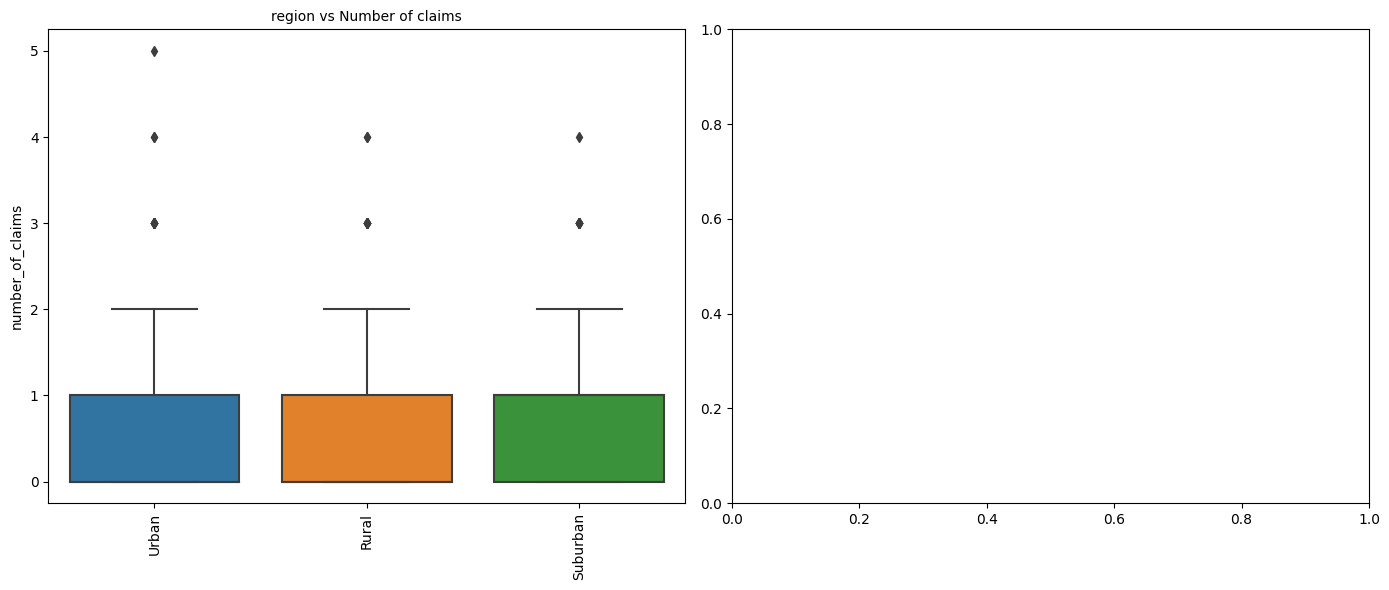

In [14]:
# Bivariate Analysis: categorical features vs price
categorical_cols = ['region']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) 
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(categorical_cols):
    sns.boxplot(data=data, x=col, y='number_of_claims', ax=axes[i])
    axes[i].set_title(f'{col} vs Number of claims', fontsize=10)
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('number_of_claims')
    axes[i].tick_params(axis='x', rotation=90)  

plt.tight_layout()
plt.show()

- The median number of claims, which is 1,  is consistent across all three regions, indicating that the region does not have a significant impact on the number of claims

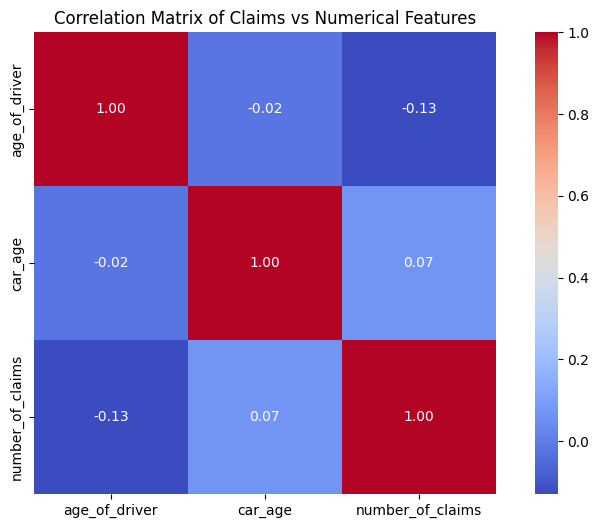

In [18]:
def correlation(user_features_train):
    """
    Plots correlation matrix.

    """
    plt.figure(figsize=(10, 6))
    corr = user_features_train.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
    plt.title('Correlation Matrix of Claims vs Numerical Features')
    plt.show()

correlation(data)

- The correlation plot als shows weak negative correlation (-0.13) between age of driver and number of claims, indicationg that younger drivers tend to have more claims while older drivers tend to have fewe, but this relationship is not significant.
- Same for age of car, the correlation is positive but weak (0.07), as the car gets old the number of claims increases.

In [21]:
def calculate_predictive_power(df, target):
    """
    Calculates the predictive power score (PPS) for variables in a dataframe against a target variable.
    
    """
    predictors_df = pps.predictors(df, target)
    sorted_predictors = predictors_df.sort_values(by="ppscore", ascending=False)
    
    return sorted_predictors

predictors_df = calculate_predictive_power(data, "number_of_claims")
predictors_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,car_age,number_of_claims,0.003492,regression,True,mean absolute error,0.675,0.672643,DecisionTreeRegressor()
1,age_of_driver,number_of_claims,0.000000,regression,True,mean absolute error,0.675,0.682606,DecisionTreeRegressor()
2,region,number_of_claims,0.000000,regression,True,mean absolute error,0.675,0.684796,DecisionTreeRegressor()


- All these feature have a very weak predictive power of number of claims, however car age shows a slight notable predictive power.

In [22]:
def encode_region(df):
    """
    Performs one-hot encoding on the categorical features.

    """
    # One-hot encode 'region' 
    categories_encoded = pd.get_dummies(df['region'], prefix='region')
    
    # Drop the original columns to avoid redundancy
    df = df.drop(['region'], axis=1)
    
    # Concatenate the original DataFrame with the new one-hot encoded columns
    df = pd.concat([df, categories_encoded], axis=1)
    
    return df

train = encode_region(data)

In [24]:
def set_features_and_target(df):
    '''
    Returns two data frames with features and target variables.

    '''
    X = df.drop(['number_of_claims'], axis=1)
    y = df['number_of_claims']
    
    return X,y
                 
X,y = set_features_and_target(train)
print(X.shape, y.shape)

(1000, 5) (1000,)


In [26]:
def train_test_split_df(X,y):
    '''
    Creates train and test split.

    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_df(X,y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(700, 5) (700,)
(300, 5) (300,)


In [27]:
def model_application(X_train, y_train, optimiser):
    """
    Model application. If optimiser is true, a grid search is applied to optimise the model. 
    If optimiser is false, the base model is used.

    """
    if optimiser:
        params = {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'max_features': ['auto', 'sqrt', 'log2'],
            'min_samples_split': [2, 10],
            'min_samples_leaf': [1, 4],
            'bootstrap': [True, False]
        }

        # Use K-fold cross-validation with GridSearch to find the best parameters
        grid = GridSearchCV(RandomForestRegressor(), 
                            param_grid=params, 
                            scoring='neg_mean_squared_error', 
                            n_jobs=-1, cv=5, verbose=1)
        
        # Fitting the model
        grid.fit(X_train, y_train)

        print('Best Score:', -grid.best_score_)  # Making it positive for easier interpretation
        print('Best Params:', grid.best_params_)
        print('Best Estimator:', grid.best_estimator_)

        rf = grid.best_estimator_
    else:
        # Use a base RandomForestRegressor model
        rf = RandomForestRegressor(n_estimators=100, 
                                   max_depth=16,
                                   min_samples_split=10, 
                                   max_features='auto', 
                                   min_samples_leaf=4, 
                                   bootstrap=True)
        rf.fit(X_train, y_train)

    return rf 
optimiser = True
rf = model_application(X_train, y_train, optimiser)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Score: 0.6381819885114173
Best Params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Estimator: RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=4,
                      min_samples_split=10)


In [28]:
def model_predict(rf, X_test):
    """
    Create y_pred, model prediction based on test set features.

    """
    y_pred = rf.predict(X_test)
    return y_pred

y_pred = model_predict(rf, X_test)

# Print R-squared for training and test sets
print('Training R-squared Score (%):', rf.score(X_train, y_train) * 100)
print('Test R-squared Score (%):', rf.score(X_test, y_test) * 100)

# Print other regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Training R-squared Score (%): 27.20225588121493
Test R-squared Score (%): -7.557405868142308
Mean Squared Error: 0.8181413831474615
Root Mean Squared Error: 0.9045116821509059


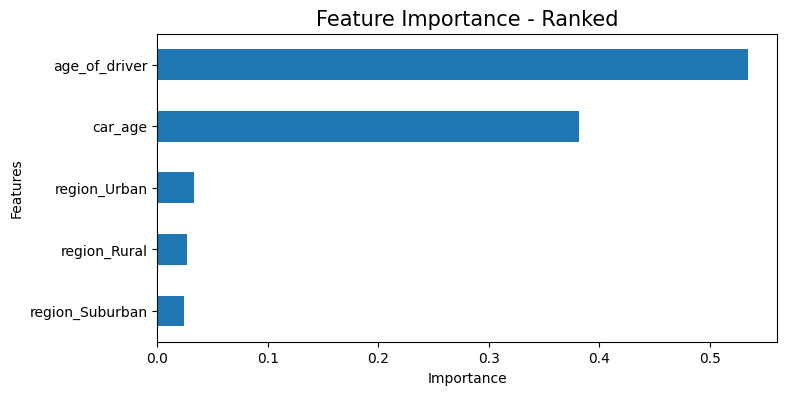

In [29]:
def plot_feature_importance(model, feature_names, n=30):
    
    '''
    Produces a plot displaying features that are most important predictors of the target feature.
            Parameters:
                    random forest model
                    feature names
    '''
    
    plt.figure(figsize=(8, 4))

    feat_importances = pd.Series(model.feature_importances_, index=feature_names)
    feat_importances.nsmallest(n).plot(kind='barh')
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title("Feature Importance - Ranked", fontsize=15)
    plt.show()

plot_feature_importance(rf, X_train.columns)

- The Random Forest Regressor is not perfoming well, this poor performance suggests that the model is not capturing the underlying patterns in the data well. Since the the nature of number of claims is a discrete variable and event count frequency, this is more suitable for poisson or negative binomial regression.

### Car Insurance Modelling for Event Frequency using Poisson and Negative Binomial Regression

- Poisson regression assumes that the mean and variance of the distribution are equal, while the negative binomial regression relaxes this assumption, making it more flexible for overdispersed data

In [32]:
def fit_poisson_glm(data, predictors, response):
    """
    Fits a Poisson GLM model to the provided data.

    """
    # Adding constant to the predictor variables
    X = data[predictors]
    y = data[response]
    X_const = sm.add_constant(X)

    # Building the Poisson GLM model
    poisson_glm = sm.GLM(y, X_const, family=sm.families.Poisson()).fit()

    # Returning the model summary
    return poisson_glm.summary()


# Define predictors and response
predictors = ['age_of_driver', 'car_age', 'region_Rural', 'region_Suburban','region_Urban']
response = 'number_of_claims'

# Fit the Poisson GLM model and get the summary
model_summary = fit_poisson_glm(train, predictors, response)
print(model_summary)

                 Generalized Linear Model Regression Results                  
Dep. Variable:       number_of_claims   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      995
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1072.8
Date:                Fri, 24 May 2024   Deviance:                       1057.7
Time:                        15:48:07   Pearson chi2:                     981.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02232
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0274      0.115     

- const: The estimate is 0.0274, The intercept represents the expected log count of claims when all predictors are zero. It is not statistically significant (p-value: 0.811), meaning it doesn’t significantly contribute to the model.
- age_of_driver: The coefficient is -0.0169, which is statistically significant (p<0.001). This indicates that as the driver’s age increases, the log count of claims decreases. For each additional year of the driver's age, the expected number of claims decreases by approximately 1.7% (calculated as exp(-0.0169)).
- car_age: The coefficient is 0.0170, which is marginally significant (p=0.053). This suggests that as the car age increases, the log count of claims slightly increases. For each additional year of the car’s age, the expected number of claims increases by approximately 1.7% (calculated as exp(0.0170)).
- region (Rural, Suburban, Urban): The coefficients for the regions are not statistically significant, p-values > 0.001, indicating that the region does not have a significant impact on the number of claims. 

#### Summary 
- The Poisson GLM suggests that the driver’s age is a significant predictor of the number of claims, with older drivers having fewer claims. 
- Car age is also a marginally significant predictor, with older cars having slightly more claims. 
- The region (Urban, Rural, Suburban) does not significantly affect the number of claims. The overall explanatory power of the model is low, as indicated by the Pseudo R-squared value (0.022), suggesting that other factors not included in the model may be influencing the number of claims.